## Setting up

In [5]:
import os 
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches5
from matplotlib.patches import Rectangle, ConnectionPatch, Arc
import numpy as np
import json
from pandas.io.json import json_normalize
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

os.chdir("/FootballAnalysis_DataScience/")
df_dk = pd.read_csv("df_dk.csv", sep=";") # Importing preprocessed data 
df.head()

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
0,8,Pass,1.656214,258612104,2057954,1H,122671,"[{'y': 50, 'x': 50}, {'y': 53, 'x': 35}]",85,Simple pass,[{'id': 1801}],16521
1,8,Pass,4.487814,258612106,2057954,1H,139393,"[{'y': 53, 'x': 35}, {'y': 19, 'x': 75}]",83,High pass,[{'id': 1801}],16521
2,1,Duel,5.937411,258612077,2057954,1H,103668,"[{'y': 81, 'x': 25}, {'y': 83, 'x': 37}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",14358
3,1,Duel,6.406961,258612112,2057954,1H,122940,"[{'y': 19, 'x': 75}, {'y': 17, 'x': 63}]",10,Air duel,"[{'id': 701}, {'id': 1802}]",16521
4,8,Pass,8.562167,258612110,2057954,1H,122847,"[{'y': 17, 'x': 63}, {'y': 15, 'x': 71}]",85,Simple pass,[{'id': 1801}],16521


## Plotting actions
#### Inspiration from this code: https://github.com/tuangauss/DataScienceProjects/blob/master/Python/football_visual.ipynb

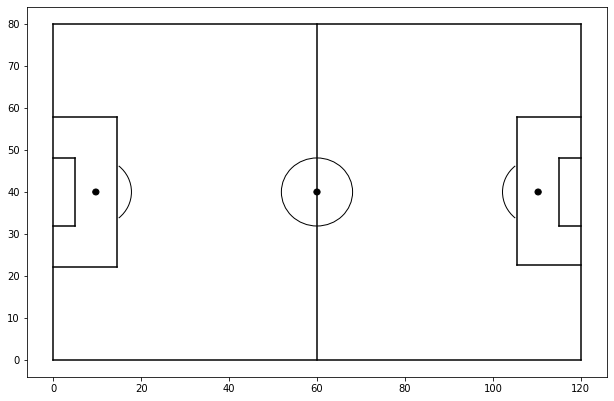

In [8]:
# Drawing the football field
def draw_pitch(ax):
    # size of the pitch is 120, 80
    #Create figure

    #Pitch Outline & Centre Line
    plt.plot([0,0],[0,80], color="black")
    plt.plot([0,120],[80,80], color="black")
    plt.plot([120,120],[80,0], color="black")
    plt.plot([120,0],[0,0], color="black")
    plt.plot([60,60],[0,80], color="black")

    #Left Penalty Area
    plt.plot([14.6,14.6],[57.8,22.2],color="black")
    plt.plot([0,14.6],[57.8,57.8],color="black")
    plt.plot([0,14.6],[22.2,22.2],color="black")

    #Right Penalty Area
    plt.plot([120,105.4],[57.8,57.8],color="black")
    plt.plot([105.4,105.4],[57.8,22.5],color="black")
    plt.plot([120, 105.4],[22.5,22.5],color="black")

    #Left 6-yard Box
    plt.plot([0,4.9],[48,48],color="black")
    plt.plot([4.9,4.9],[48,32],color="black")
    plt.plot([0,4.9],[32,32],color="black")

    #Right 6-yard Box
    plt.plot([120,115.1],[48,48],color="black")
    plt.plot([115.1,115.1],[48,32],color="black")
    plt.plot([120,115.1],[32,32],color="black")

    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="black",fill=False)
    centreSpot = plt.Circle((60,40),0.71,color="black")
    leftPenSpot = plt.Circle((9.7,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")

    #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)

    #Prepare Arcs
    # arguments for arc
    # x, y coordinate of centerpoint of arc
    # width, height as arc might not be circle, but oval
    # angle: degree of rotation of the shape, anti-clockwise
    # theta1, theta2, start and end location of arc in degree
    leftArc = Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")

    #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)

fig=plt.figure()
#fig.set_size_inches(7, 5)
fig.set_size_inches(10.4,6.8)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax)

In [9]:
#----WITH PLAYER ID-------#
def heat_pass_map(data, player_ID):
    pass_data = data[(data['eventName'] == "Pass") & (data['playerId'] == player_ID)]
    action_data = data[(data['playerId']==player_ID)]
    
    fig=plt.figure()
    #fig.set_size_inches(7, 5)   
    ax=fig.add_subplot(1,1,1)

    draw_pitch(ax)
    plt.axis('on')
    
    for i in range(len(pass_data)):
        # we also differentiate different half by different color
        color = "blue" if pass_data.iloc[i]['matchPeriod'] == "1H" else "red"
        x_start = pass_data.iloc[i]['x1']
        y_start = pass_data.iloc[i]['y1']
        x_end = pass_data.iloc[i]['x2']
        y_end = pass_data.iloc[i]['y2']
        
        ax.annotate("", xy = (x_end, y_end), xycoords = 'data',
               xytext = (x_start, y_start), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = color),)
    #sns.kdeplot(x_start, y_start, shade = "True", color = "green", n_levels = 30)
    
    
    plt.ylim(0,80) # need this, otherwise kde plot will go outside
    plt.xlim(0,120)
    plt.show()

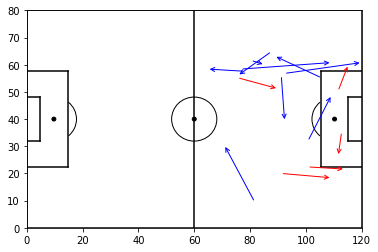

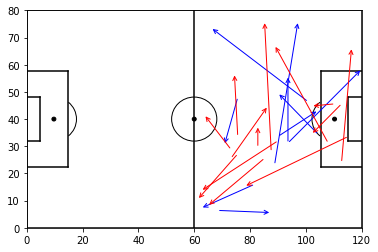

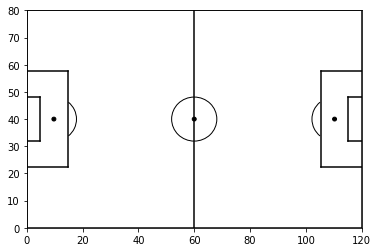

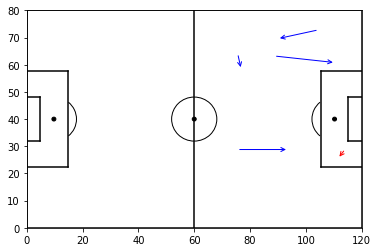

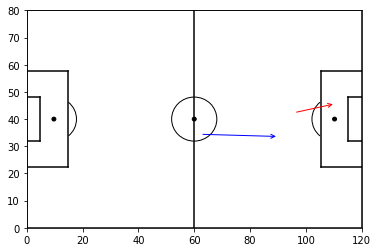

In [10]:
# AFLEVERINGER I DK' FRANKRIG' KAMP
heat_pass_map(dk_fr, 54) # C. Eriksen 
heat_pass_map(dk_fr, 20433) # S. Kjær
heat_pass_map(dk_fr, 15080) # N. Jørgensen
heat_pass_map(dk_fr, 135150) # A. Cornelius 
heat_pass_map(dk_fr, 55979) # M. Zanka J 

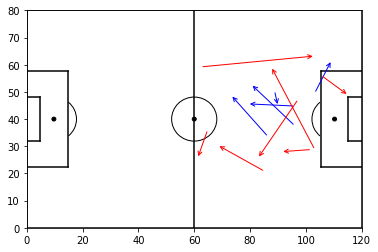

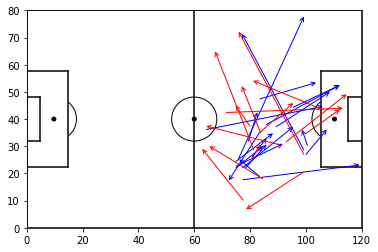

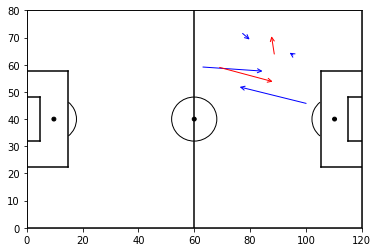

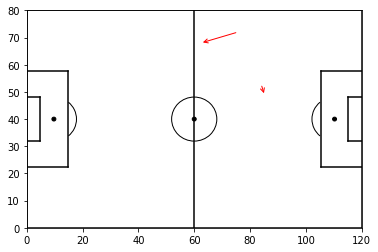

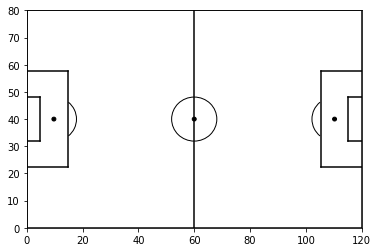

In [11]:
# AFLEVERINGER I DK KROATIEN KAMP
heat_pass_map(dk_au, 54) # C. Eriksen 
heat_pass_map(dk_au, 20433) # S. Kjær
heat_pass_map(dk_au, 15080) # N. Jørgensen
heat_pass_map(dk_au, 135150) # A. Cornelius 
heat_pass_map(dk_au, 55979) # M. Zanka J 

## Choosing k

#### First, standardizes features by scaling each feature to a given range.  

In [12]:
data = df_dk.copy()[["x1", "y1", "x2", "y2"]]

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

#### The elbow method

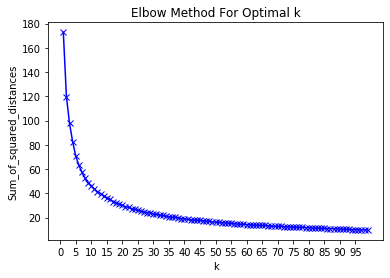

In [13]:
Sum_of_squared_distances = []
K = range(1,100)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.xticks(range(0,100,5))
plt.axis()
plt.show()

#### Silhoutte plot

Para n_clusters = 10 O score_silhouette médio é : 0.24383303981113427
Para n_clusters = 11 O score_silhouette médio é : 0.23351774920874988
Para n_clusters = 12 O score_silhouette médio é : 0.22490500861871826
Para n_clusters = 13 O score_silhouette médio é : 0.2253340913527479
Para n_clusters = 14 O score_silhouette médio é : 0.23754516907753404
Para n_clusters = 15 O score_silhouette médio é : 0.23760846383717907
Para n_clusters = 16 O score_silhouette médio é : 0.24108225719402956
Para n_clusters = 17 O score_silhouette médio é : 0.23763885713508526
Para n_clusters = 18 O score_silhouette médio é : 0.24123012417911202
Para n_clusters = 19 O score_silhouette médio é : 0.24379336953017083
Para n_clusters = 20 O score_silhouette médio é : 0.2386499884084585
Para n_clusters = 21 O score_silhouette médio é : 0.24713902890880998
Para n_clusters = 22 O score_silhouette médio é : 0.2325816801905401
Para n_clusters = 23 O score_silhouette médio é : 0.23692802784691894
Para n_clusters = 24 O 

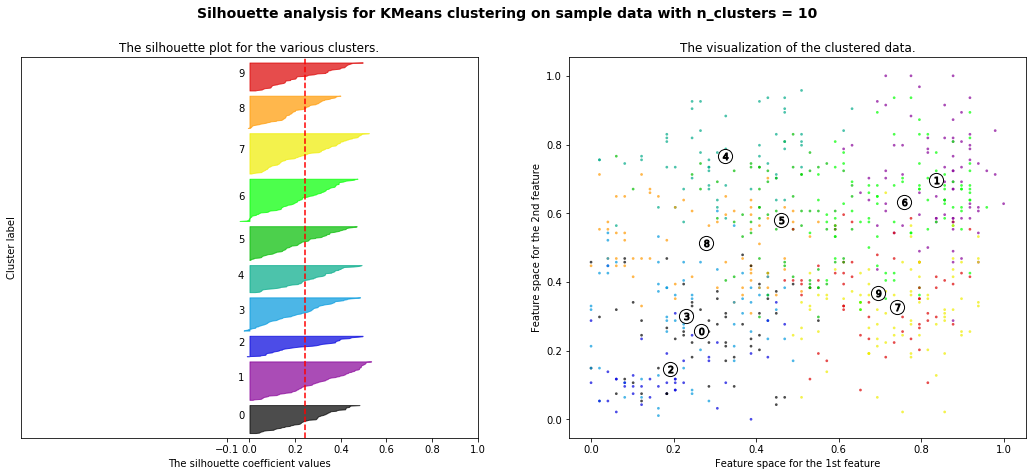

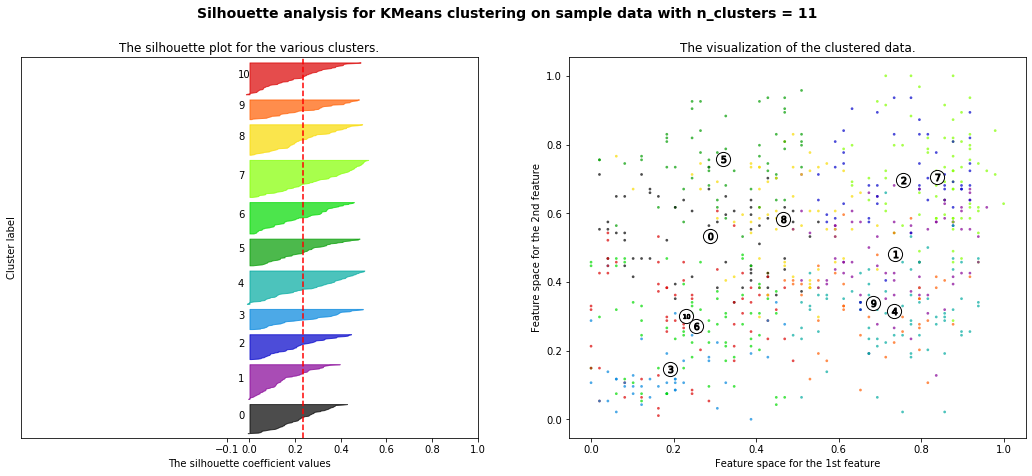

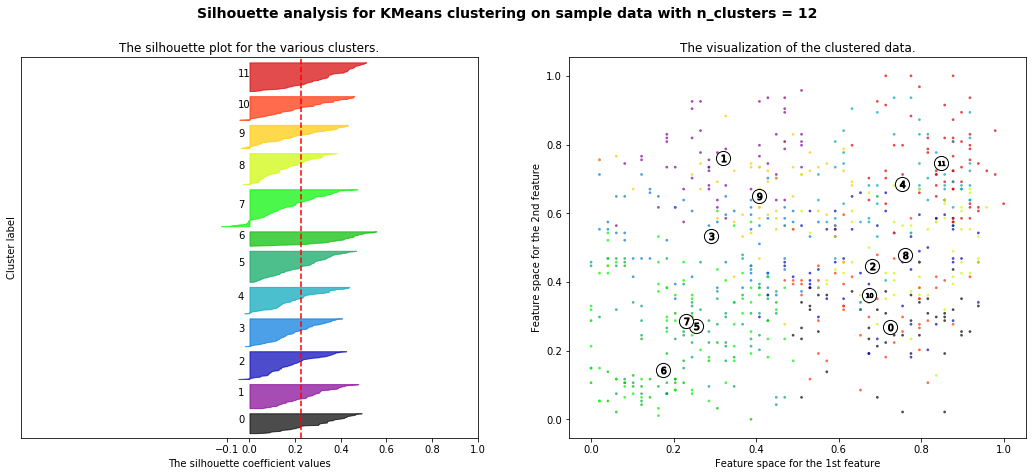

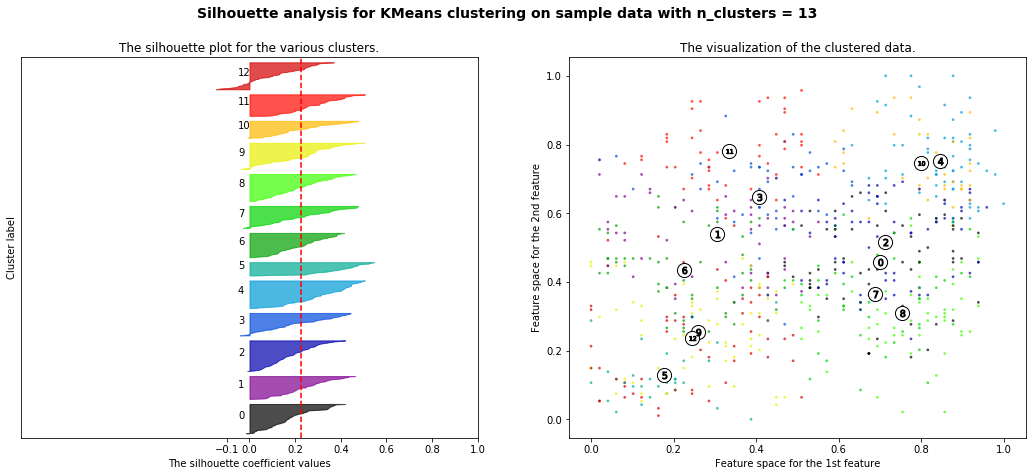

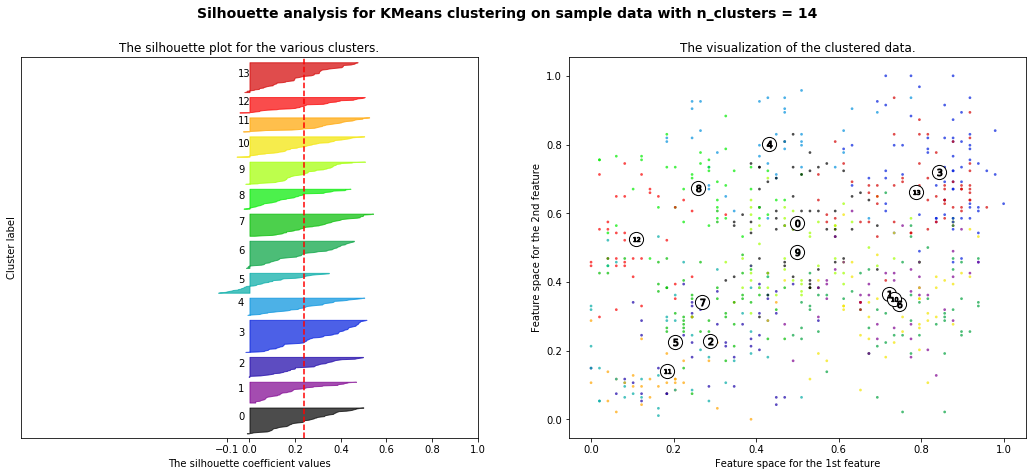

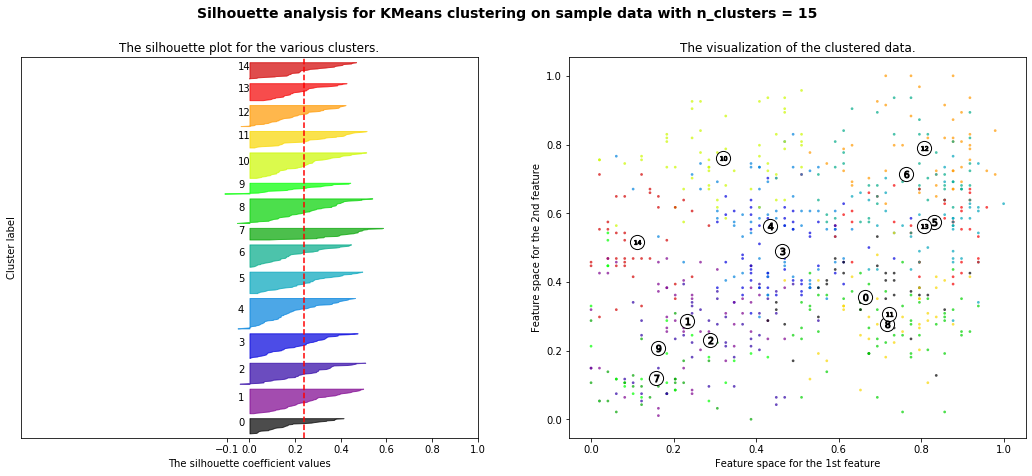

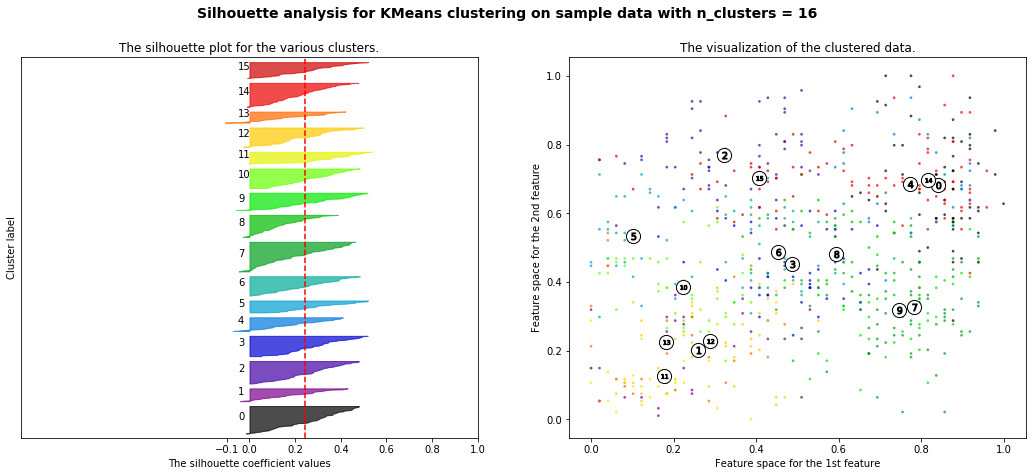

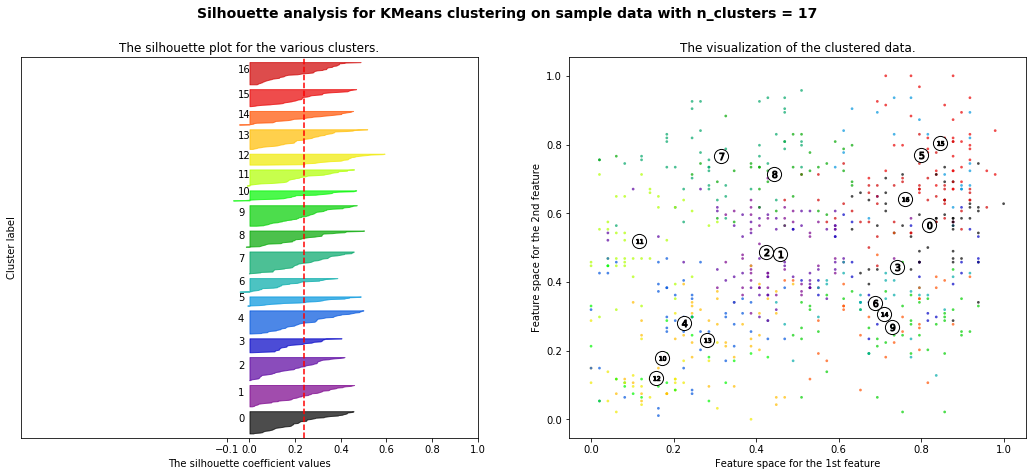

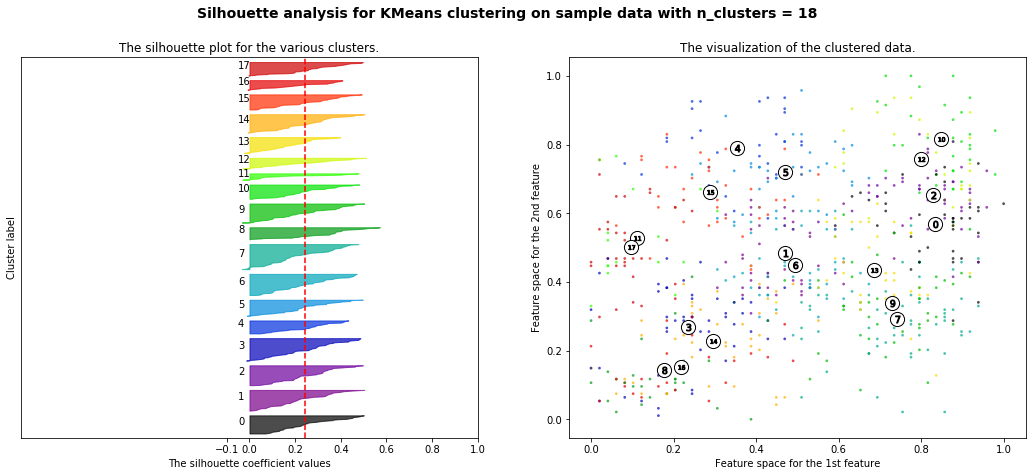

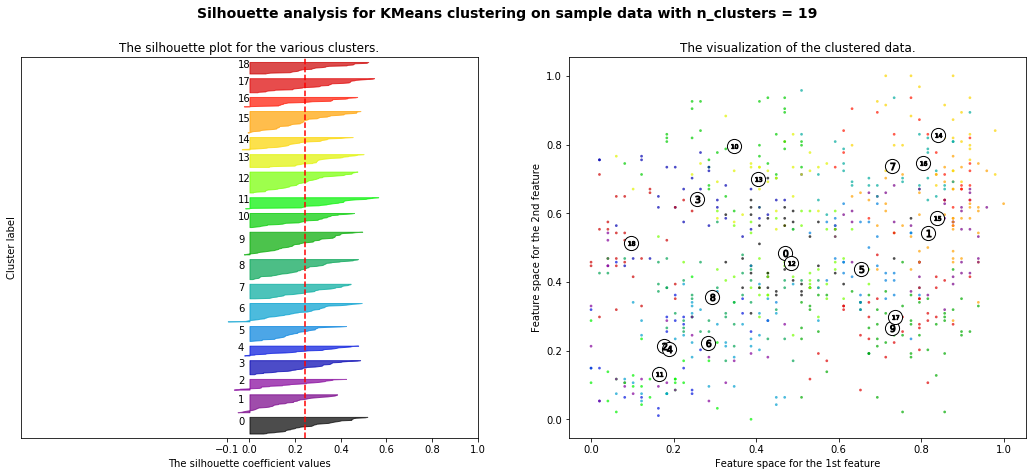

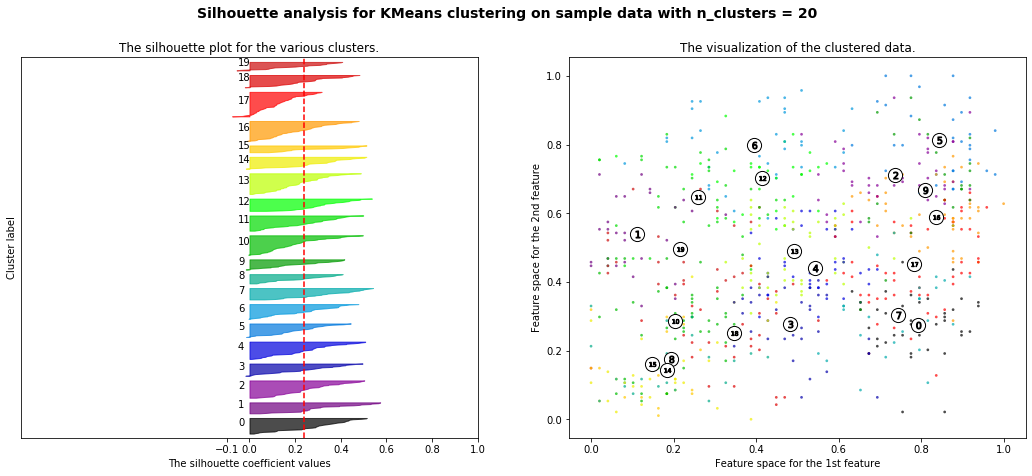

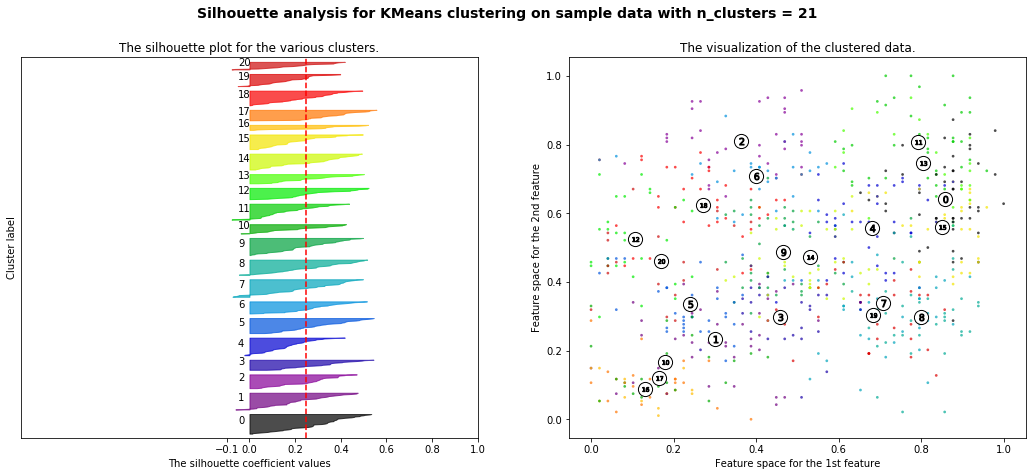

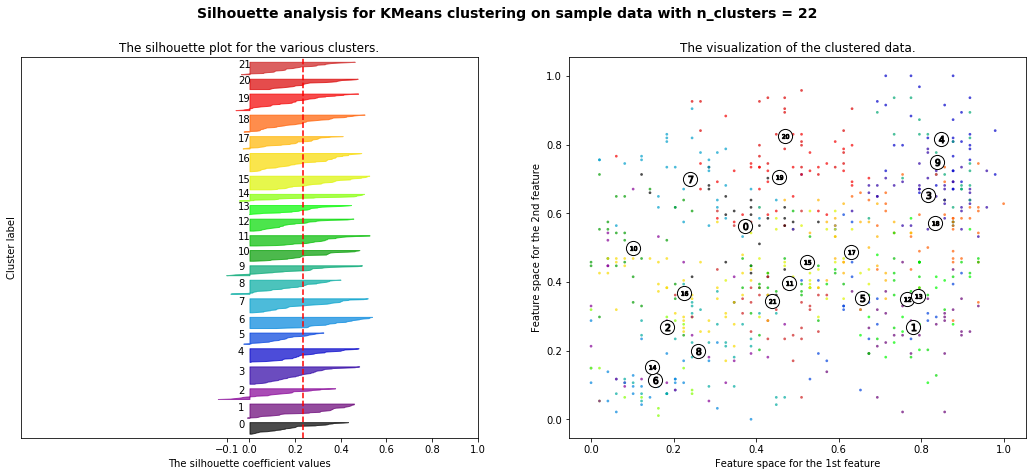

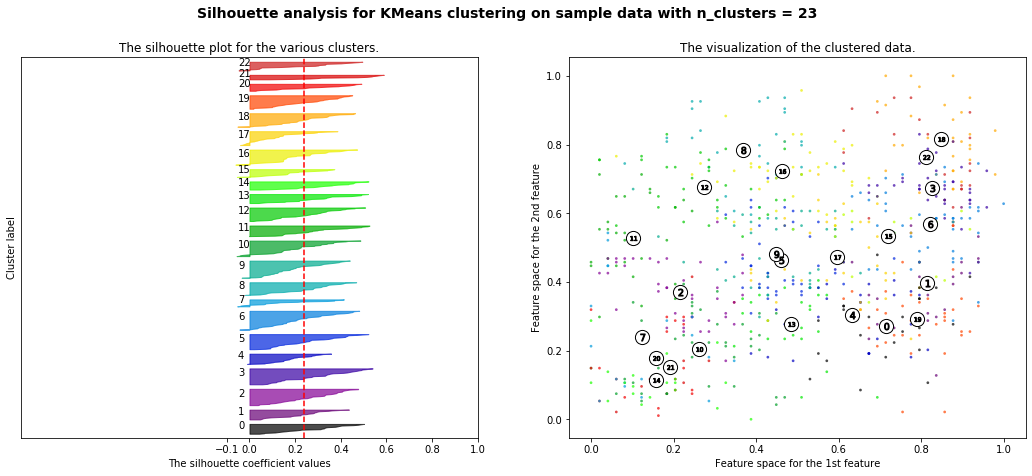

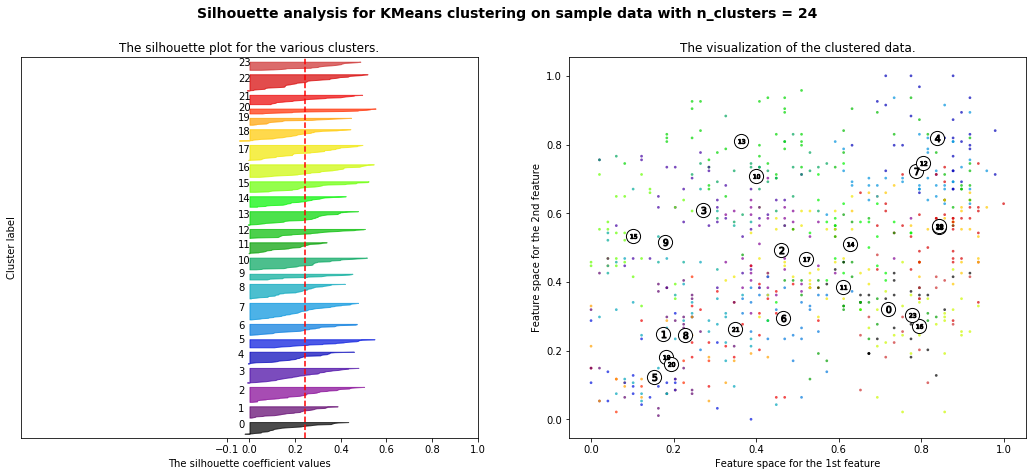

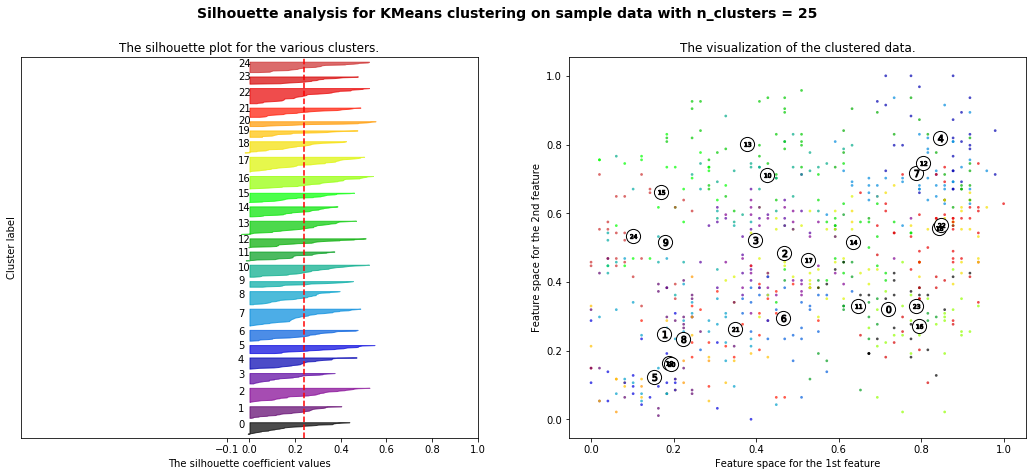

In [14]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [*range(10,26,1)] # The range of the k values 

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data_transformed) + (n_clusters + 1) * 10])
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data_transformed)
# The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_transformed, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "O score_silhouette médio é :", silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_transformed, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color,       alpha=0.7)
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data_transformed[:, 0], data_transformed[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
plt.show()

#### Training the K-means model

## Running the final k-means with the chosen k

In [15]:
# from sklearn.cluster import KMeans
data = df_dk.copy()

data = data[["id","x1", "y1", "x2", "y2", "accurate", "not_accurate", "match", "playerId"]]

number_of_clusters = 21
import random
random.seed(182)
kmeans = KMeans(n_clusters = number_of_clusters, init ='k-means++', random_state=5)
kmeans.fit(data[data.columns[1:5]]) # Compute k-means clustering.
data['cluster_label'] = kmeans.fit_predict(data[data.columns[1:5]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(data[data.columns[1:5]]) # Labels of each point
data.head()

,id,x1,y1,x2,y2,accurate,not_accurate,match,playerId,cluster_label
25074,260506095,105.6,62.4,111.6,56.0,1,0,DK_FR,55968,10
25075,260506097,111.6,56.0,80.4,61.6,1,0,DK_FR,56394,5
25076,260506099,80.4,61.6,85.2,60.0,1,0,DK_FR,54,13
25077,260506100,85.2,60.0,78.0,57.6,1,0,DK_FR,55990,13
25078,260506103,78.0,57.6,64.8,58.4,0,1,DK_FR,54,11


In [16]:
#Gathering the coordinates (a list for each pair)
cluster_df = data.copy()
cluster_df['start_coordinate'] = cluster_df[['x1', "y1"]].values.tolist()
cluster_df['end_coordinate'] = cluster_df[['x2', "y2"]].values.tolist()

#cluster_df.to_csv('Outputs/DF_clusters.csv')
cluster_df.head()

,id,x1,y1,x2,y2,accurate,not_accurate,match,playerId,cluster_label,start_coordinate,end_coordinate
25074,260506095,105.6,62.4,111.6,56.0,1,0,DK_FR,55968,10,"[105.6, 62.400000000000006]","[111.60000000000001, 56.0]"
25075,260506097,111.6,56.0,80.4,61.6,1,0,DK_FR,56394,5,"[111.60000000000001, 56.0]","[80.4, 61.6]"
25076,260506099,80.4,61.6,85.2,60.0,1,0,DK_FR,54,13,"[80.4, 61.6]","[85.19999999999999, 60.0]"
25077,260506100,85.2,60.0,78.0,57.6,1,0,DK_FR,55990,13,"[85.19999999999999, 60.0]","[78.0, 57.599999999999994]"
25078,260506103,78.0,57.6,64.8,58.4,0,1,DK_FR,54,11,"[78.0, 57.599999999999994]","[64.80000000000001, 58.4]"


#### Plotting the clusters

In [17]:
def heat_pass_map(data):
    
    fig=plt.figure()
    fig.set_size_inches(7, 5)
    ax=fig.add_subplot(1,1,1)
    #ax.set_xlim([0,100])
    #ax.set_ylim([0,100])
    draw_pitch(ax)
    plt.axis('off')

    for i in range(len(data)):
        # we also differentiate different half by different color
        if data.iloc[i]['accurate'] == 1:
            color="green"
        elif data.iloc[i]['accurate'] == 0:
            color="red"
        else: 
            color="black"
        ax.annotate("", xy = (data.iloc[i]['end_coordinate'][0], data.iloc[i]['end_coordinate'][1]), xycoords = 'data',
               xytext = (data.iloc[i]['start_coordinate'][0], data.iloc[i]['start_coordinate'][1]), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = color),)
        #ax.set_xlim([0,100])
        #ax.set_ylim([0,100])
    ax.set_title('Cluster %d' %c)
    x_coord = [i[0] for i in data["start_coordinate"]]
    y_coord = [i[1] for i in data["start_coordinate"]]
    #sns.kdeplot(x_coord, y_coord, shade = "True", color = "green", n_levels = 30)
    plt.ylim(0, 80) # need this, otherwise kde plot will go outside
    plt.xlim(0, 120)
    plt.savefig('Outputs/Clusters/Cluster_%d.png' %c, bbox_inches='tight')
    plt.show()

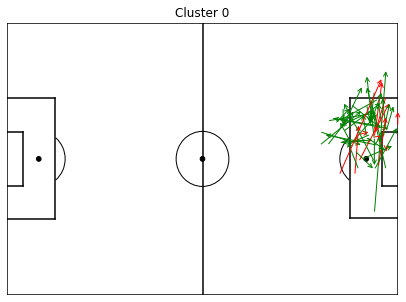

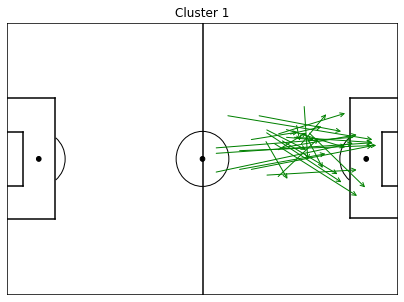

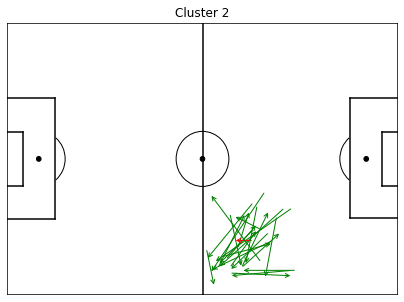

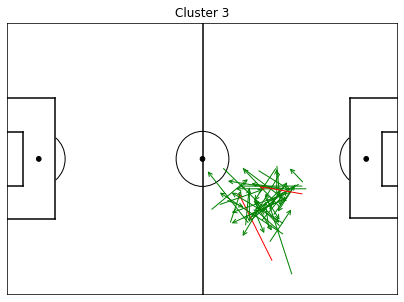

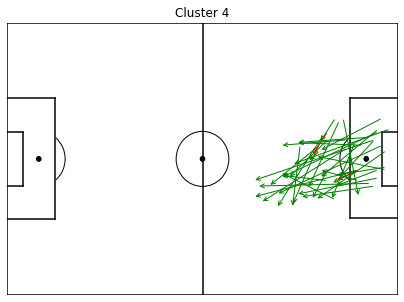

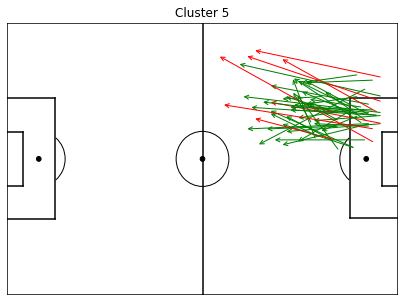

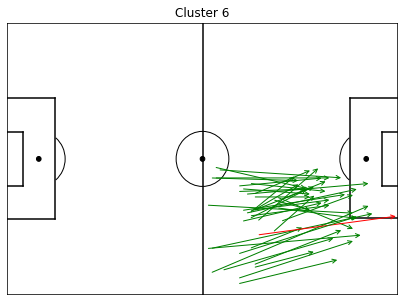

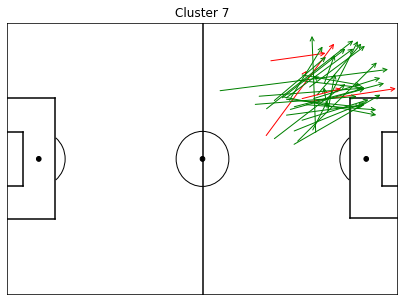

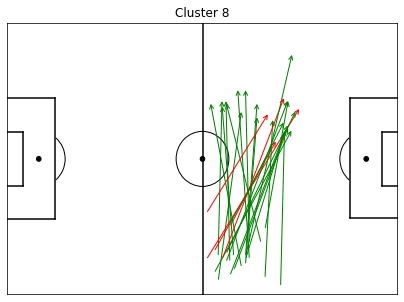

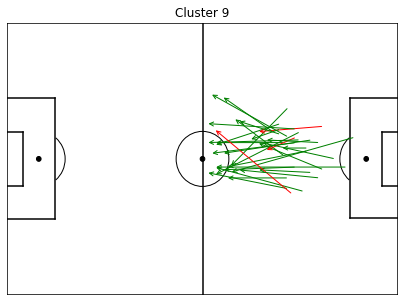

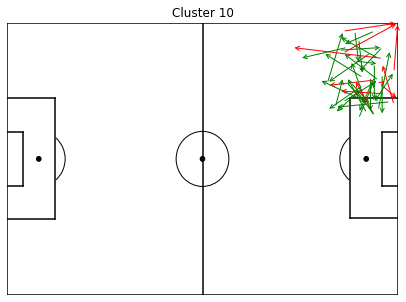

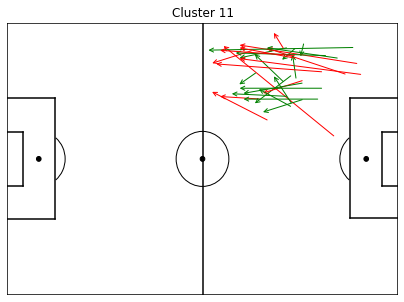

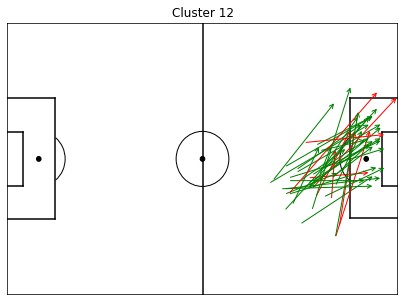

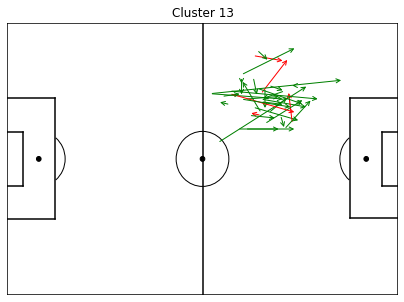

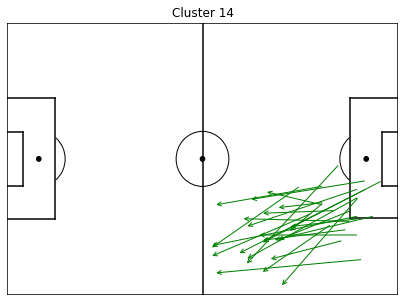

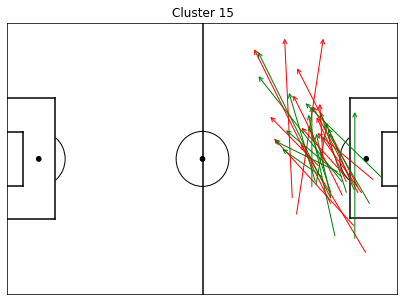

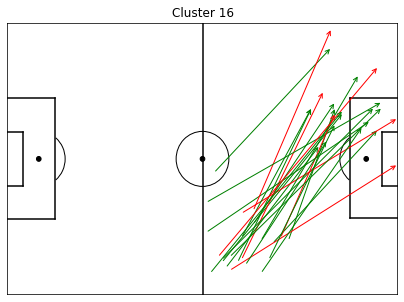

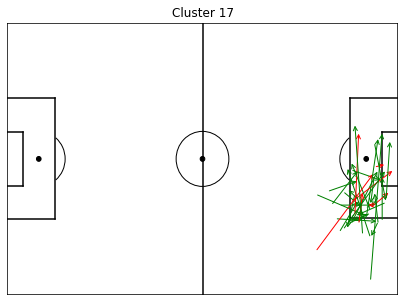

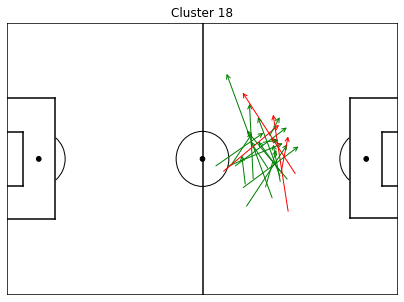

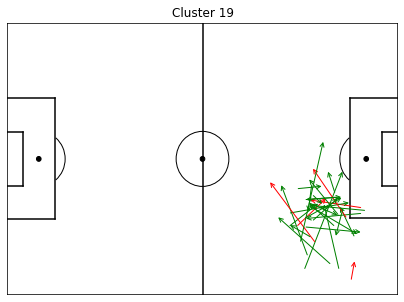

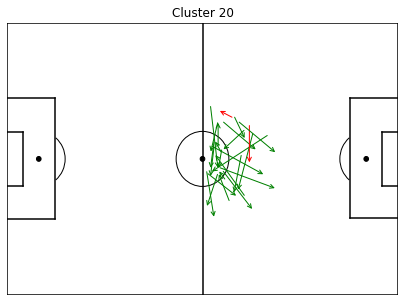

In [18]:
clusters = sorted(list(cluster_df.cluster_label.unique()))
for c in clusters: 
        heat_pass_map(cluster_df[cluster_df.cluster_label==c])

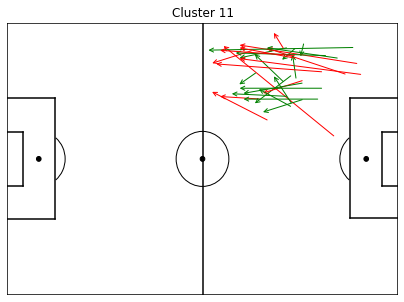

In [22]:
# Look at a single cluster
c = 11
heat_pass_map(cluster_df[cluster_df.cluster_label==c])

In [20]:
# Look at what clusters that had the highest number of accurates in the France and Croatia game

AU = cluster_df[cluster_df.match=="DK_AU"]
FR = cluster_df[cluster_df.match=="DK_FR"]
CR = cluster_df[cluster_df.match=="DK_CR"]
PE = cluster_df[cluster_df.match=="DK_PE"]

ct_AU = pd.crosstab(AU['cluster_label'], AU['accurate'])
ct_FR = pd.crosstab(FR['cluster_label'], FR['accurate'])
ct_CR = pd.crosstab(CR['cluster_label'], CR['accurate'])
ct_PE = pd.crosstab(PE['cluster_label'], PE['accurate'])

print(ct_FR.sort_values(by=[1], ascending=False).head(2))
print(ct_CR.sort_values(by=[1], ascending=False).head(2))

accurate       0   1
cluster_label       
17             4  16
0              1  13
accurate       0   1
cluster_label       
3              0  19
19             3  14


In [21]:
# Look at what clusters that had the highest number of not-accurates in the France and Croatia game

AU = cluster_df[cluster_df.match=="DK_AU"]
FR = cluster_df[cluster_df.match=="DK_FR"]
CR = cluster_df[cluster_df.match=="DK_CR"]
PE = cluster_df[cluster_df.match=="DK_PE"]

ct_AU = pd.crosstab(AU['cluster_label'], AU['not_accurate'])
ct_FR = pd.crosstab(FR['cluster_label'], FR['not_accurate'])
ct_CR = pd.crosstab(CR['cluster_label'], CR['not_accurate'])
ct_PE = pd.crosstab(PE['cluster_label'], PE['not_accurate'])

print(ct_FR.sort_values(by=[1], ascending=False).head(2))
print(ct_CR.sort_values(by=[1], ascending=False).head(2))

not_accurate    0  1
cluster_label       
15              1  5
17             16  4
not_accurate   0  1
cluster_label      
0              5  4
11             8  4


## Investigating the clusters

In [16]:
ct_match = pd.crosstab(cluster_df['match'], cluster_df['cluster_label'])
print(ct_match)

cluster_label  0   1   2   3   4   5   6   7   8   9   ...  11  12  13  14  \
match                                                  ...                   
DK_AU          15   8   3  11  10  16   9   9   1   6  ...   6  13   9   3   
DK_CR           9  10  13  19  12  15  13  11   9  12  ...  12   9  13  10   
DK_FR          14   5   6  10   5   9   9   8  11   5  ...   4   5   6   5   
DK_PE          12   5   2   5   9   7   8   8   4   6  ...   7  12   6   6   

cluster_label  15  16  17  18  19  20  
match                                  
DK_AU           7   3   1   7   7   4  
DK_CR          11  11  12   8  17  11  
DK_FR           6   2  20   4   4   6  
DK_PE           6   7   3   3   2   4  

[4 rows x 21 columns]


In [17]:
ct = pd.crosstab(cluster_df['accurate'], cluster_df['cluster_label'])
print(ct)

cluster_label  0   1   2   3   4   5   6   7   8   9   ...  11  12  13  14  \
accurate                                               ...                   
0              10   0   1   2   2   8   1   5   4   3  ...  12   8   5   0   
1              40  28  23  43  34  39  38  31  21  26  ...  17  31  29  24   

cluster_label  15  16  17  18  19  20  
accurate                               
0              14   6   7   5   5   2  
1              16  17  29  17  25  23  

[2 rows x 21 columns]
